# Striplog from image

We're going to try to make a striplog from an image of a striplog. The impage is Figure 1 from Audrey Estublier*,  Alexandre Fornel,  Étienne Brosse,  Pascal Houel,  Jean-Claude Lecomte,Jocelyne Delmas  and  Olivier Vincké (2017). Simulation of a Potential CO2Storage in the West ParisBasin: Site Characterization and Assessment of theLong-Term Hydrodynamical and Geochemical ImpactsInduced by the CO2Injection. Oil & Gas Science and Technology–Rev. IFP Energies nouvelles (2017) 72, 22. DOI:10.2516/ogst/2017021, licensed CC-BY 4.0.

Fingers crossed!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import striplog
striplog.__version__

'0.8.8'

I checked the PDF and unfortunately the artwork is not stored as vector art &mdash; it's a raster. So we'll just have to deal with the various bits of decoration and the low resolution.

Here's the whole page as a PNG.

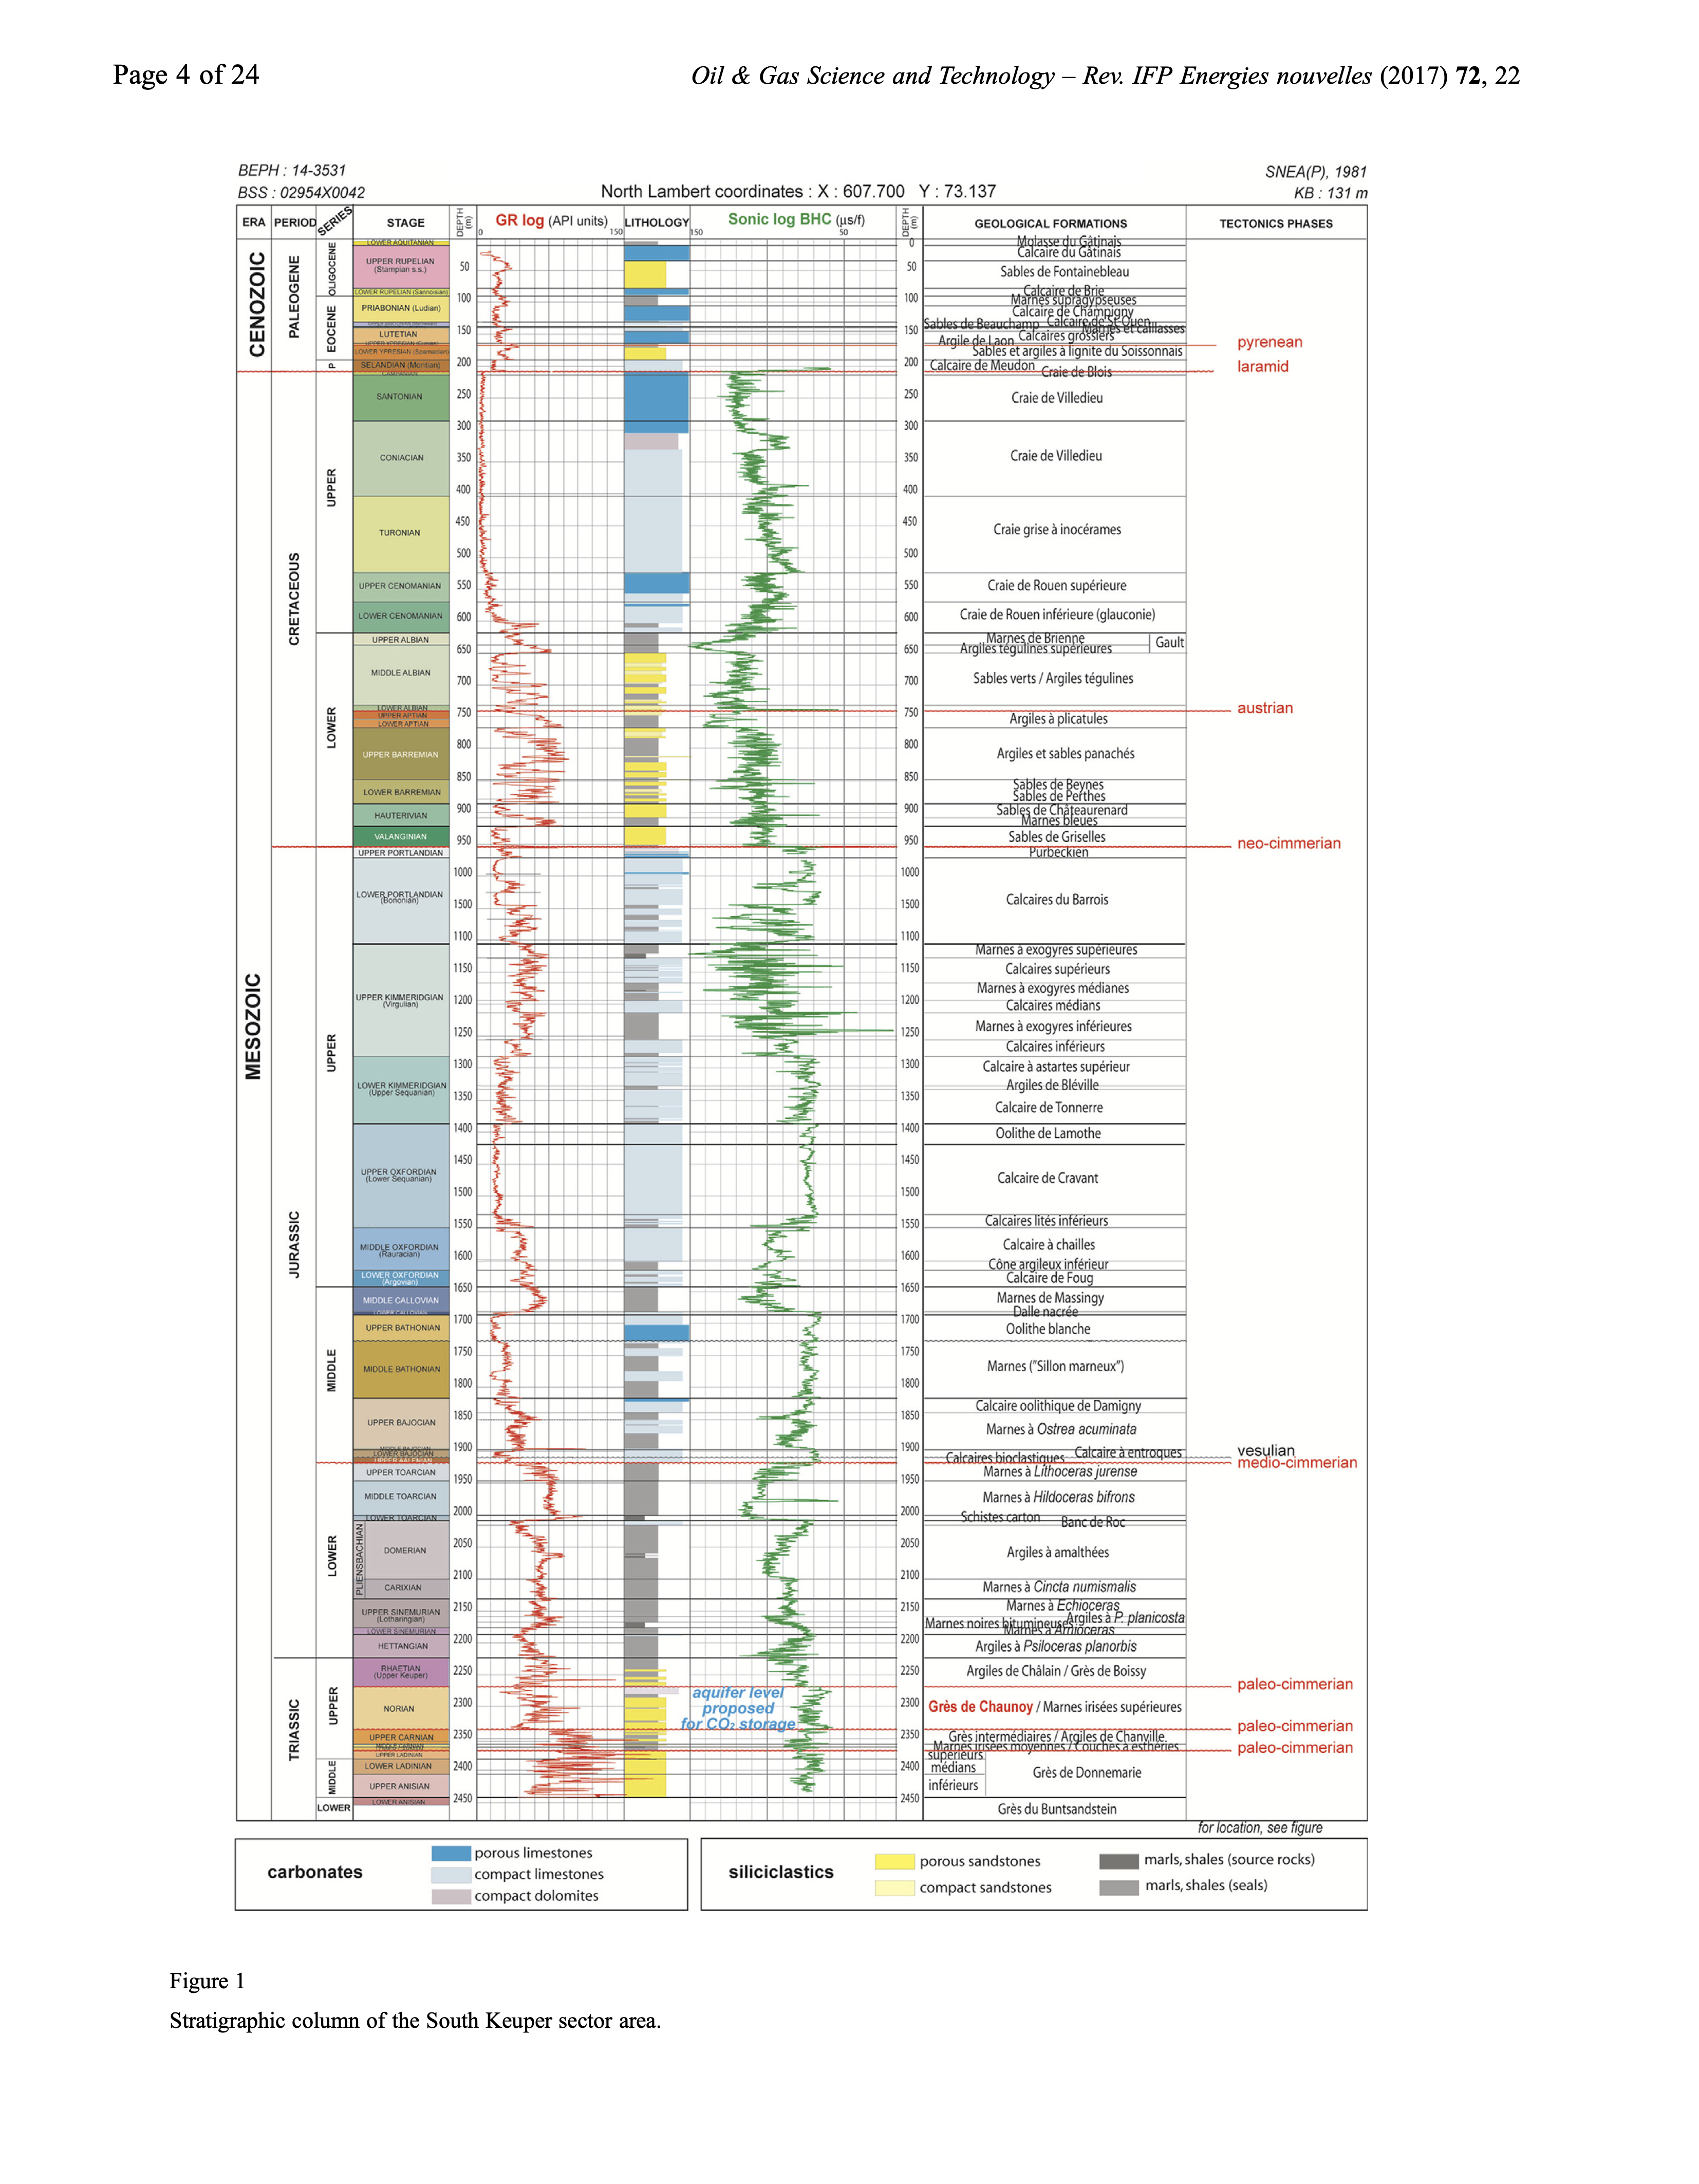

In [2]:
from IPython.display import Image

Image("./data/ogst160144.png", width=400)

We need to know the start and end depth, so I cropped out just the striplog itself. It goes from 0 m to 2450 m.

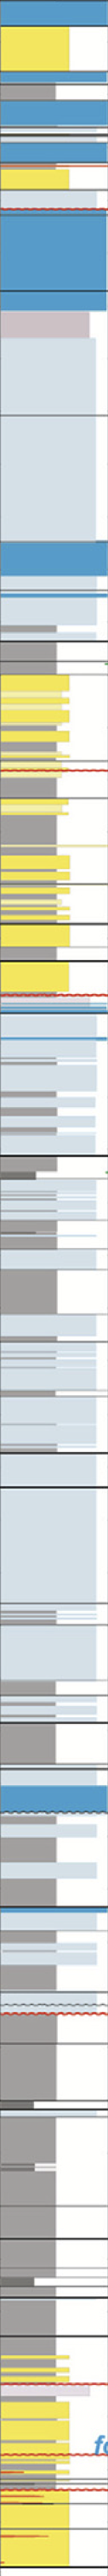

In [3]:
Image("./data/ogst160144_striplog-only.png")

Some of the decoration might cause problems, let's see.

## Make a legend

`Striplog`s are made of `Interval`s.

`Interval`s (usually) contain `Component`s. 

The `Legend` is the lookup table for the `Component`s we're going to place in the `Interval`s.

The colours just have to be close to the colours in the image.

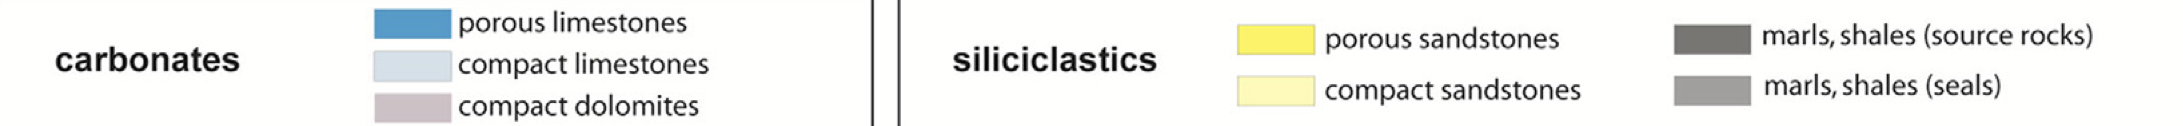

In [4]:
Image("./data/ogst160144_legend.png")

We need 'Components'. They are defined by property dictionaries, which can contain whatever we want.

In [5]:
from striplog import Legend

legend_text = """colour,width,comp lithology,comp properties,comp role
#009ccc,10,limestone,porous,
#d2e1e8,9,limestone,compact,
#d1c2c7,8,dolomite,compact,
#fcf36b,6,sandstone,porous,
#fefabb,5,sandstone,compact,
#787775,3,marl/shale,,source rock
#a4a09f,4,marl/shale,,seal
"""

legend = Legend.from_csv(text=legend_text)
legend

Legend(Decor({'_colour': '#009ccc', 'width': 10.0, 'component': Component({'lithology': 'limestone', 'properties': 'porous'}), 'hatch': None})
Decor({'_colour': '#d2e1e8', 'width': 9.0, 'component': Component({'lithology': 'limestone', 'properties': 'compact'}), 'hatch': None})
Decor({'_colour': '#d1c2c7', 'width': 8.0, 'component': Component({'lithology': 'dolomite', 'properties': 'compact'}), 'hatch': None})
Decor({'_colour': '#fcf36b', 'width': 6.0, 'component': Component({'lithology': 'sandstone', 'properties': 'porous'}), 'hatch': None})
Decor({'_colour': '#fefabb', 'width': 5.0, 'component': Component({'lithology': 'sandstone', 'properties': 'compact'}), 'hatch': None})
Decor({'_colour': '#787775', 'width': 3.0, 'component': Component({'lithology': 'marl/shale', 'role': 'source rock'}), 'hatch': None})
Decor({'_colour': '#a4a09f', 'width': 4.0, 'component': Component({'lithology': 'marl/shale', 'role': 'seal'}), 'hatch': None}))

## Making a `striplog`

In [6]:
striplog.utils.loglike_from_image("./data/ogst160144_striplog-only_doubled.png", offset=10)

array([[0.20392157, 0.25882354, 0.27450982],
       [0.19215687, 0.32156864, 0.38039216],
       [0.17254902, 0.41960785, 0.53333336],
       ...,
       [1.        , 1.        , 0.99215686],
       [1.        , 1.        , 0.99215686],
       [1.        , 1.        , 0.99215686]], dtype=float32)

In [7]:
from striplog import Striplog

strip = Striplog.from_img("./data/ogst160144_striplog-only_doubled.png",
                          start=0, stop=2450,
                          col_offset=5,     # How far across the image to extract pixels.
                          legend=legend,
                          tolerance=60,     # How forgiving to be on the colours.
                          row_offset=1,      # How far below a boundary to look at the colour.
                          background='#ffffff',  # Ignore this colour
                         )

# Expect warnings for colours which don't match the legend.

/Users/matt/opt/miniconda3/envs/py39/lib/python3.9/site-packages/striplog/striplog.py:892: UserWarning: from_img() is deprecated; please use from_image()
  warnings.warn(w)


In [8]:
strip

Striplog(435 Intervals, start=7.7596266044340725, stop=2450.0)

In [9]:
strip = strip.merge_neighbours()

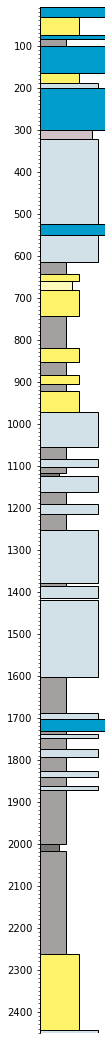

In [10]:
strip.plot(legend=legend, lw=1, aspect=10)

## Write CSV or LAS3

In [11]:
print(strip.to_csv())

Top,Base,Component
7.7596266044340725,32.67211201866978,"Limestone, porous"
32.67211201866978,74.32905484247375,"Sandstone, porous"
74.32905484247375,84.13068844807468,"Limestone, porous"
84.13068844807468,101.28354725787631,"Marl/shale, seal"
101.28354725787631,164.17736289381563,"Limestone, porous"
164.17736289381563,189.08984830805136,"Sandstone, porous"
189.08984830805136,201.34189031505252,"Limestone, compact"
201.34189031505252,300.1750291715286,"Limestone, porous"
300.1750291715286,322.6371061843641,"Dolomite, compact"
322.6371061843641,524.7957992998834,"Limestone, compact"
524.7957992998834,551.3418903150525,"Limestone, porous"
551.3418903150525,615.0525087514585,"Limestone, compact"
615.0525087514585,643.6406067677947,"Marl/shale, seal"
643.6406067677947,659.5682613768962,"Sandstone, porous"
659.5682613768962,682.8471411901984,"Sandstone, compact"
682.8471411901984,742.8821470245041,"Sandstone, porous"
742.8821470245041,818.8448074679113,"Marl/shale, seal"
818.8448074679113,8

In [12]:
print(strip.to_las3())

~Lithology_Parameter
LITH .   Striplog         : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHD.                    : Lithology description     {S}

~Lithology_Data | Lithology_Definition
7.7596266044340725,32.67211201866978,"Limestone, porous"
32.67211201866978,74.32905484247375,"Sandstone, porous"
74.32905484247375,84.13068844807468,"Limestone, porous"
84.13068844807468,101.28354725787631,"Marl/shale, seal"
101.28354725787631,164.17736289381563,"Limestone, porous"
164.17736289381563,189.08984830805136,"Sandstone, porous"
189.08984830805136,201.34189031505252,"Limestone, compact"
201.34189031505252,300.1750291715286,"Limestone, porous"
300.1750291715286,322.6371061843641,"Dolomite, compact"
322.6371061843641,524.7957992998834,"Limestone, compact"
524.7957992998834,551.3418903150525,"Limestone, porous"


<hr />

<p style="color:gray">©2021 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>